In [81]:
import scipy as sp
import numpy as np
import pandas as pd
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta, datetime
import re
import timeit

pd.options.display.max_rows = 4000

In [82]:
ships = pd.read_csv(r'C:\Users\kwonk\Guided Project\Hurricane_RMDS\Practice\Dataset_SHIPS_RII_ATL.csv')

In [83]:
# Set all 9999s as NaNs
ships = ships.replace(9999,np.NaN)

# Pad the date columns with 00 for the year 2000
ships['DATE'] = ships['DATE'].apply(lambda x: str(x).zfill(6))

# Extract month from date
ships['MONTH'] = ships['DATE'].apply(lambda x: str(x)[2:4])

# Extract year from date
ships['YEAR'] = ships['DATE'].apply(lambda x: ('19' + str(x)[0:2]) if (str(x)[0:1]!= '0' and str(x)[0:1]!= '1') else ('20' + str(x)[0:2]))

# Creating Time Stamp column
ships['HOUR']=ships['HOUR'].astype(str).replace('0', '00').replace('6','06')
ships['TIMESTAMP']=ships['DATE'] + ships['HOUR']

date_format="%y%m%d%H"
ships['TIMESTAMP']=pd.to_datetime(ships['TIMESTAMP'],format=date_format)


In [84]:
# Viewing the data
ships.head(40)


,NAME,DATE,HOUR,VMX0,LAT,LON,MSLP,ID,DELV12,DELV24,...,OHC,TPW,PC2,U200,TPWC,AVBT,RSST,MONTH,YEAR,TIMESTAMP
0,ALEX,980727,12,25,11.3,-25.4,1009,AL011998,0.0,5.0,...,12.0,0,-58.0,-7.9,55.7,-473.0,27.4,07,1998,1998-07-27 12:00:00
1,ALEX,980727,18,25,11.7,-27.2,1009,AL011998,0.0,5.0,...,17.0,0,-10.0,-6.4,55.7,-360.0,27.4,07,1998,1998-07-27 18:00:00
2,ALEX,980728,00,25,12.2,-29.2,1009,AL011998,5.0,10.0,...,21.0,0,-3.0,-8.8,56.9,-381.0,27.4,07,1998,1998-07-28 00:00:00
3,ALEX,980728,06,25,12.6,-31.3,1008,AL011998,5.0,10.0,...,29.0,0,-44.0,-6.0,52.7,-481.0,27.2,07,1998,1998-07-28 06:00:00
4,ALEX,980728,12,30,12.9,-33.3,1007,AL011998,5.0,5.0,...,15.0,190,-46.0,-6.5,55.3,-516.0,27.1,07,1998,1998-07-28 12:00:00
5,ALEX,980728,18,30,13.1,-35.1,1006,AL011998,5.0,5.0,...,22.0,15,36.0,-7.2,56.6,-270.0,27.1,07,1998,1998-07-28 18:00:00
6,ALEX,980729,00,35,13.3,-36.8,1005,AL011998,0.0,0.0,...,24.0,0,-6.0,-10.3,57.7,-443.0,27.1,07,1998,1998-07-29 00:00:00
7,ALEX,980729,06,35,13.5,-38.5,1005,AL011998,0.0,5.0,...,19.0,0,7.0,-8.6,59.8,-411.0,26.8,07,1998,1998-07-29 06:00:00
8,ALEX,980729,12,35,13.7,-40.0,1005,AL011998,0.0,5.0,...,23.0,29,99.0,-8.4,57.6,-130.0,26.7,07,1998,1998-07-29 12:00:00
9,ALEX,980729,18,35,13.9,-41.3,1005,AL011998,5.0,10.0,...,22.0,71,-6.0,-4.8,54.8,-399.0,26.8,07,1998,1998-07-29 18:00:00


In [85]:
"""Question 1: What are the frequency distributions of hurricane intensity and intensity change in 24 /36/48 hours?""" 

'Question 1: What are the frequency distributions of hurricane intensity and intensity change in 24 /36/48 hours?'

In [86]:
def hist_plot(data):

    plt.figure(figsize=(12, 8))
    plt.grid()
    bins = range(-112, 102, 5)
    plt.hist(ships[data], bins=bins, rwidth=0.8, color='blue')

    ticks = np.arange(0, 15, 5)
    plt.ylabel('Frequency (%)')

    plt.xticks(range(-100, 100, 20))
    plt.xlabel('Intensity Change (knot)')
    plt.title('Histogram of ' + data, fontsize=15, fontweight='bold')    
        
        
        
    plt.show()
    

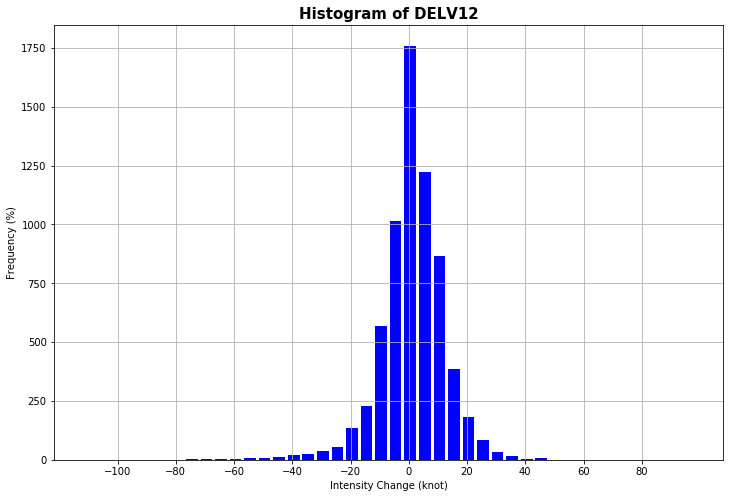

In [87]:
hist_plot('DELV12')

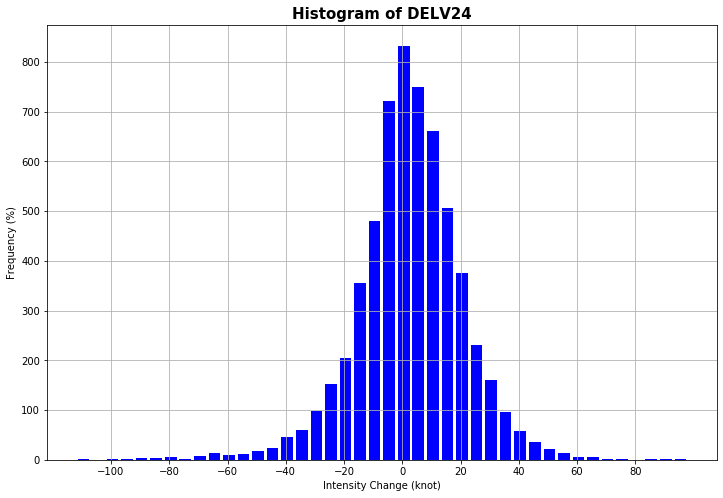

In [88]:
hist_plot('DELV24')

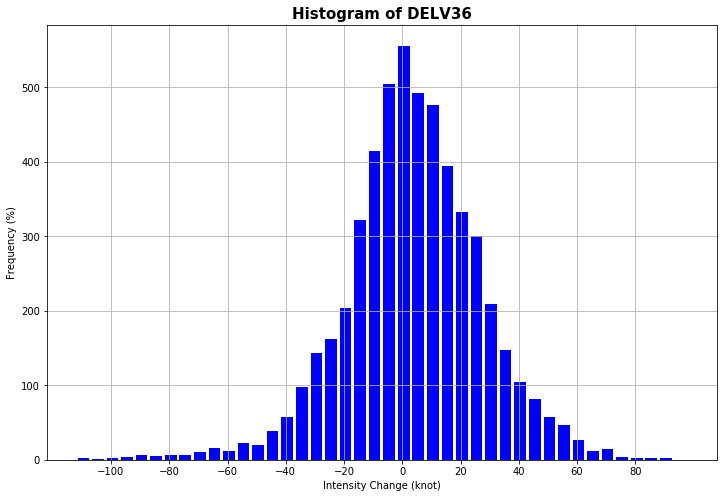

In [89]:
hist_plot('DELV36')

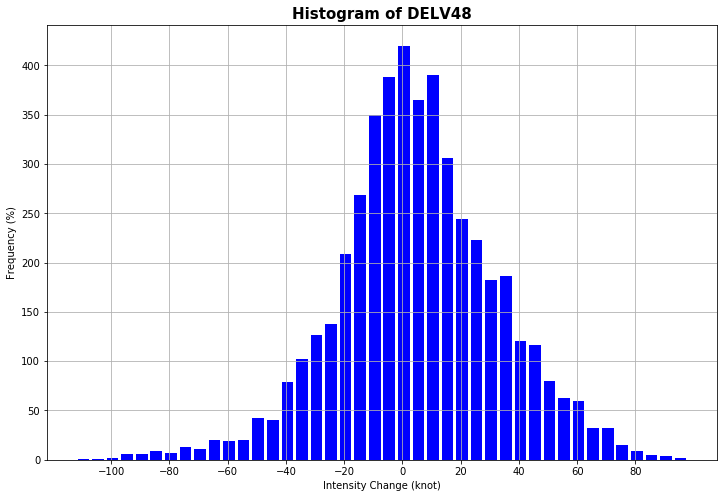

In [90]:
hist_plot('DELV48')

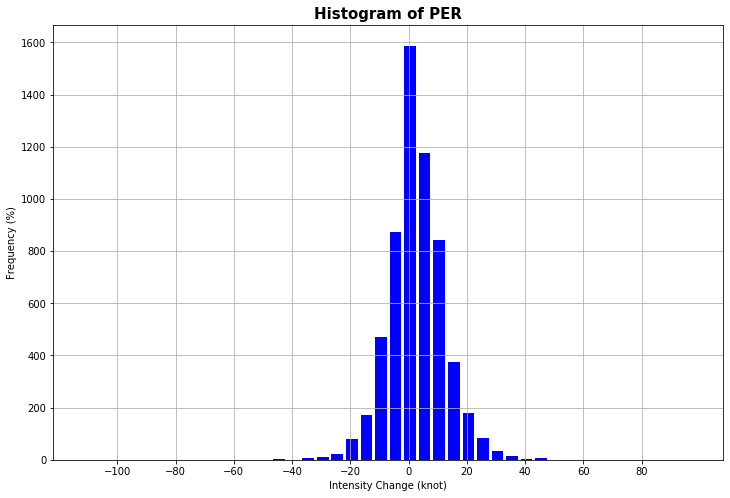

In [91]:
hist_plot('PER')

In [92]:
# Question 2: Are there more hurricanes in the recent decade than before (1998 to 2007 versus 2008 to 2017)?

In [93]:
ships['YEAR']=ships['YEAR'].astype(int)

num_recent_hurr=len(ships[ships['YEAR']>=2008]['ID'].unique())
num_old_hurr=len(ships[ships['YEAR']<=2007]['ID'].unique())

print("Total Number of Recent Hurricanes: %i" %(num_recent_hurr))
print("Total Number of Old Hurricanes: %i" %(num_old_hurr))


Total Number of Recent Hurricanes: 158
Total Number of Old Hurricanes: 175


In [94]:
# Question 3: Have hurricanes become stronger with time?

Text(0.5, 0, 'Year')

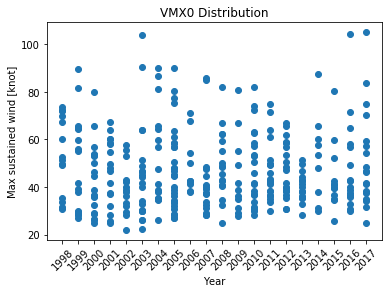

In [95]:
hurr_mean=ships.groupby('ID').mean()
hurr_mean['INDEX'] = hurr_mean.index

hurr_mean['YEAR'] = hurr_mean['INDEX'].apply(lambda x: x[-4:])
plt.scatter(hurr_mean['YEAR'],hurr_mean['VMX0'])
plt.xticks(rotation=45)
plt.title('VMX0 Distribution')
plt.ylabel('Max sustained wind [knot]')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

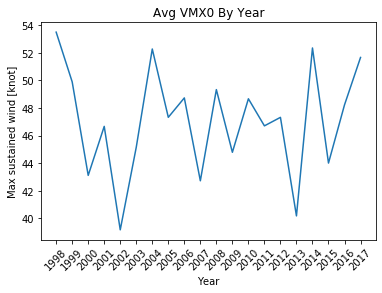

In [96]:
hurr_mean_by_year = hurr_mean.groupby('YEAR').mean()
plt.plot(hurr_mean_by_year.index,hurr_mean_by_year['VMX0'])
plt.xticks(rotation=45)
plt.title('Avg VMX0 By Year')
plt.ylabel('Max sustained wind [knot]')
plt.xlabel('Year')

In [97]:
# Question 4: Has RI become more frequent?

Text(0.5, 0, 'Year')

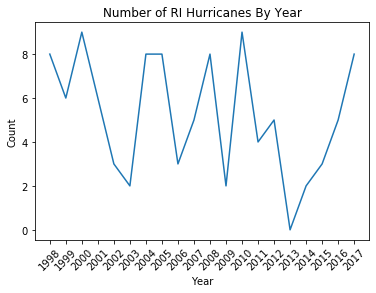

In [118]:
years = ships['YEAR'].unique()

DELV24_LIST = []


for year in years:
    ships_year = ships[ships['YEAR']==year]
    ships_grouped = ships_year.groupby('ID').max()
    
    num_RI = len(ships_grouped[ships_grouped['DELV24'] >= 30])
    
    DELV24_LIST.append([year,num_RI])
    
#     print(DELV24_LIST)
#     break

RI_YEAR = pd.DataFrame(DELV24_LIST, columns = ['YEAR', 'DELV24']) 

plt.plot(RI_YEAR['YEAR'].astype(int),RI_YEAR['DELV24'])
plt.xticks(ships['YEAR'].unique(),rotation=45)
plt.title('Number of RI Hurricanes By Year')
plt.ylabel('Count')
plt.xlabel('Year')
